# Process MIDI files
Since Thur. Nov. 11th, 2021

Will deal with songs as MIDI files, process them as 1D discrete pitch for each time slot


## Setup



In [1]:
import os
import glob

import pandas as pd
from mido import MidiFile
import pretty_midi
import librosa
from librosa import display
import matplotlib.pyplot as plt
import seaborn as sns
from icecream import ic

from data_path import *
from util import *
from util import MidoUtil as Mu, PrettyMidiUtil as Pmu


sns.set_style('darkgrid')
os.chdir(f'../../{DIR_DSET}')
!ls

dnm = 'MIDI_EG'
d_dset = config(f'{DIR_DSET}.{dnm}')
dir_nm = d_dset['dir_nm']
path = f'{PATH_BASE}/{DIR_DSET}/{dir_nm}'
mids = sorted(glob.iglob(f'{path}/{d_dset["fmt_midi"]}', recursive=True))
ic([p[p.find(dir_nm):] for p in mids])
mid_eg = mids[2]
ic(mid_eg)



Allie-Chord-Embedding Lakh-MIDI-Dataset     MIDI-eg


ic| [p[p.find(dir_nm):] for p in mids]: ['MIDI-eg/AUD_DS1266.mid',
                                         'MIDI-eg/Alan Walker - Faded (Carlo Prato).mid',
                                         'MIDI-eg/Ed Sheeran - Shape of You (Carlo Prato).mid',
                                         'MIDI-eg/Pharrell Williams - Get lucky ft..mid',
                                         'MIDI-eg/Ryuichi Sakamoto - Merry Christmas Mr. Lawrence (freemidi).mid',
                                         'MIDI-eg/bc8830293f19b2e3941ed0b2f8bd6f00.mid',
                                         'MIDI-eg/chpn_op66.mid']
ic| mid_eg: ('/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MIDI-eg/Ed '
             'Sheeran - Shape of You (Carlo Prato).mid')


'/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MIDI-eg/Ed Sheeran - Shape of You (Carlo Prato).mid'

## mido



In [2]:
mid = MidiFile(mid_eg, clip=True)
mid.play()
# ic(mid)
# for track in mid.tracks:
#     ic(track)
ic(len(mid.tracks))

t = mid.tracks[0]
ic(mid.tracks[1])
ic(mid.tracks[2][:10])

ic(t)
ic(Mu.get_msgs_by_type(mid, 'track_name'))
ic(Mu.get_tempo_changes(mid))



ic| len(mid.tracks): 11
ic| mid.tracks[1]: MidiTrack([
                     MetaMessage('set_tempo', tempo=625000, time=0),
                     MetaMessage('end_of_track', time=0)])
ic| mid.tracks[2][:10]: MidiTrack([
                          MetaMessage('track_name', name='Voice', time=0),
                          Message('control_change', channel=11, control=10, value=64, time=0),
                          Message('control_change', channel=11, control=7, value=100, time=0),
                          Message('pitchwheel', channel=11, pitch=0, time=0),
                          Message('control_change', channel=11, control=101, value=0, time=0),
                          Message('control_change', channel=11, control=100, value=0, time=0),
                          Message('control_change', channel=11, control=6, value=12, time=0),
                          Message('control_change', channel=11, control=10, value=64, time=0),
                          Message('control_change', channel

[625000]

# music 21


In [3]:
import music21

s = music21.corpus.parse('bach/bwv65.2.xml')
# s.show()  # Need to have software installed, e.g. MuseScore
ic(s)

ic| s: <music21.stream.Score 0x170f947f0>


<music21.stream.Score 0x170f947f0>

# pretty_midi


In [4]:
pm = pretty_midi.PrettyMIDI(mid_eg)
ic(pm.get_tempo_changes())
ic(pm.get_end_time())
ic(pm.get_beats())
ic(pm.get_downbeats())
ic(pm.get_onsets())
ic(pm.instruments)
instrs = [pretty_midi.program_to_instrument_name(i.program) for i in pm.instruments]
ic(instrs)

ic([len(i.notes) for i in pm.instruments])



/usr/local/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
ic| pm.get_tempo_changes(): (array([0.]), array([120.]))
ic| pm.get_end_time(): 74.00520833333333
ic| pm.get_beats(): array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
                            5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
                           11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
                           16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
                           22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
                           27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
                           33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. 

[256, 432, 16, 60, 16, 461]

### Piano roll

ic| pr.shape: (128, 7400)
    pr.dtype: dtype('float64')
    pr[75:80, 920:960]: array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                                  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                                  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                                  0.,   0.,   0.,   0.,   0.,   0.,   0.],
                               [  0.,   0.,   0.,   0.,   0., 100., 100., 100., 100., 100., 100.,
                                100., 100., 100., 100., 100., 100., 100., 100., 200., 200., 200.,
                                200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 100.,
                                100., 100., 100., 100., 100., 100., 100.],
                               [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                                  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         

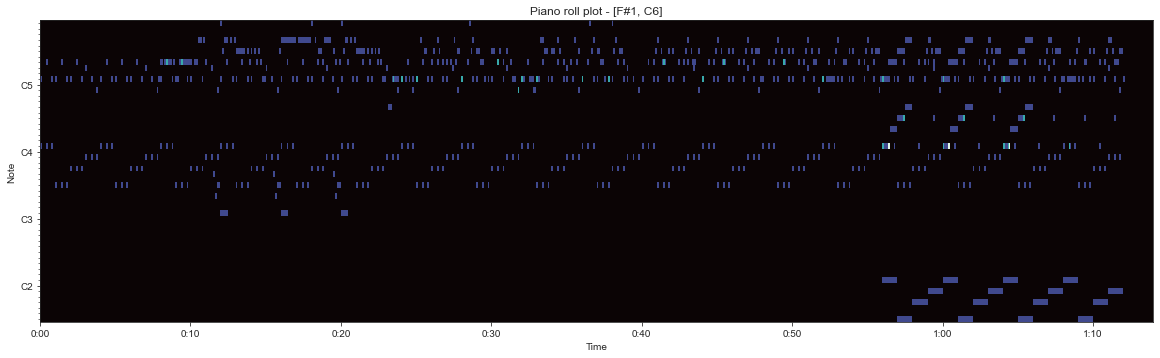

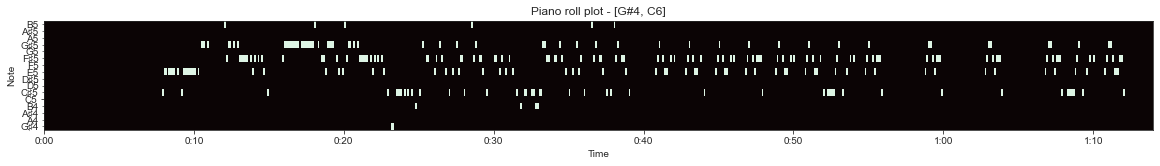

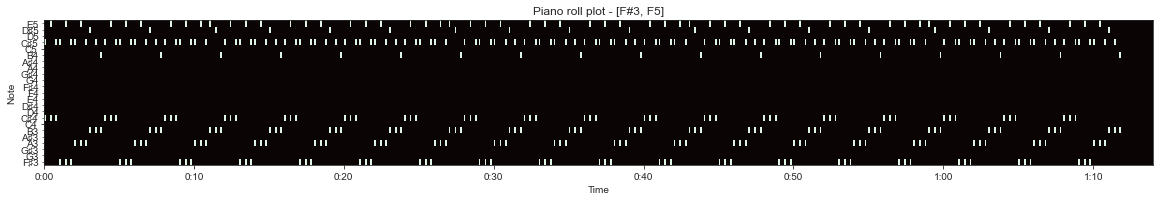

In [9]:
import numpy as np

# def get_pitch_range(pm_):
#     """
#     :return: Inclusive lower and upper bound of pitch in PrettyMIDI
#     """
#     def _get(instr_):
#         arr = np.array([n.pitch for n in instr_.notes])
#         # ic(arr)
#         # ic(np.array([arr.min(), arr.max()]))
#         return np.array([arr.min(), arr.max()])
#     # ic([_get(i) for i in pm_.instruments])
#     ranges = np.vstack(_get(i) for i in pm_.instruments)
#     # ic(ranges)
#     return ranges[:, 0].min(), ranges[:, 1].max()
#
# ic(get_pitch_range(pm))
#
#
# # from matplotlib import rcParams
# # rcParams['image.cmap'] = 'mako'
#
#
# def plot_piano_roll(pm_: pretty_midi.PrettyMIDI, strt=None, end=None, fqs=100):
#     plt.figure(figsize=(16, 9))
#     if strt is None and end is None:
#         strt, end = get_pitch_range(pm_)
#         end += 1  # inclusive np array slicing
#     kwargs = dict(
#         fmin=pretty_midi.note_number_to_hz(strt) if strt else None
#     )
#     librosa.display.specshow(
#         pm_.get_piano_roll(fqs)[strt:end],
#         hop_length=1, sr=fqs, x_axis='time', y_axis='cqt_note',
#         cmap='mako',
#         **kwargs
#     )
#     # plt.colorbar()
#     plt.title('Piano roll plot')
#
#
# pr = pm.get_piano_roll(100)
# pr_sliced = pr[65:75]
# pr_sliced = pr_sliced[:20][:2]
#
# ic(type(pr), pr.shape, pr.dtype, pr_sliced.shape, pr_sliced)
# # plot_piano_roll(pm, 10, 90)
# plot_piano_roll(pm)
# # plot_piano_roll(pm, strt=None, end=120)

pr = pm.get_piano_roll(100)
ic(pr.shape, pr.dtype, pr[75:80, 920:960])
# ic(np.where(pr > 100))

instr0 = pm.instruments[0]
instr1 = pm.instruments[1]
ic(instr0.get_piano_roll()[76, 920:960])
ic(instr1.get_piano_roll()[76, 920:960])

# Don't get the librosa warning
Pmu.plot_piano_roll(pm)  # The peak values in the plot is due to overlapping note & time, in multiple tracks
Pmu.plot_piano_roll(instr0)
Pmu.plot_piano_roll(instr1)


### Instruments for MIDI


In [6]:
instrument_nms = list(map(pretty_midi.program_to_instrument_name, range(128)))
ic(instrument_nms)

note_nms = {n: pretty_midi.note_number_to_name(n) for n in range(128)}
ic(note_nms)

ic| instrument_nms: ['Acoustic Grand Piano',
                     'Bright Acoustic Piano',
                     'Electric Grand Piano',
                     'Honky-tonk Piano',
                     'Electric Piano 1',
                     'Electric Piano 2',
                     'Harpsichord',
                     'Clavinet',
                     'Celesta',
                     'Glockenspiel',
                     'Music Box',
                     'Vibraphone',
                     'Marimba',
                     'Xylophone',
                     'Tubular Bells',
                     'Dulcimer',
                     'Drawbar Organ',
                     'Percussive Organ',
                     'Rock Organ',
                     'Church Organ',
                     'Reed Organ',
                     'Accordion',
                     'Harmonica',
                     'Tango Accordion',
                     'Acoustic Guitar (nylon)',
                     'Acoustic Guitar (steel)',
       

{0: 'C-1',
 1: 'C#-1',
 2: 'D-1',
 3: 'D#-1',
 4: 'E-1',
 5: 'F-1',
 6: 'F#-1',
 7: 'G-1',
 8: 'G#-1',
 9: 'A-1',
 10: 'A#-1',
 11: 'B-1',
 12: 'C0',
 13: 'C#0',
 14: 'D0',
 15: 'D#0',
 16: 'E0',
 17: 'F0',
 18: 'F#0',
 19: 'G0',
 20: 'G#0',
 21: 'A0',
 22: 'A#0',
 23: 'B0',
 24: 'C1',
 25: 'C#1',
 26: 'D1',
 27: 'D#1',
 28: 'E1',
 29: 'F1',
 30: 'F#1',
 31: 'G1',
 32: 'G#1',
 33: 'A1',
 34: 'A#1',
 35: 'B1',
 36: 'C2',
 37: 'C#2',
 38: 'D2',
 39: 'D#2',
 40: 'E2',
 41: 'F2',
 42: 'F#2',
 43: 'G2',
 44: 'G#2',
 45: 'A2',
 46: 'A#2',
 47: 'B2',
 48: 'C3',
 49: 'C#3',
 50: 'D3',
 51: 'D#3',
 52: 'E3',
 53: 'F3',
 54: 'F#3',
 55: 'G3',
 56: 'G#3',
 57: 'A3',
 58: 'A#3',
 59: 'B3',
 60: 'C4',
 61: 'C#4',
 62: 'D4',
 63: 'D#4',
 64: 'E4',
 65: 'F4',
 66: 'F#4',
 67: 'G4',
 68: 'G#4',
 69: 'A4',
 70: 'A#4',
 71: 'B4',
 72: 'C5',
 73: 'C#5',
 74: 'D5',
 75: 'D#5',
 76: 'E5',
 77: 'F5',
 78: 'F#5',
 79: 'G5',
 80: 'G#5',
 81: 'A5',
 82: 'A#5',
 83: 'B5',
 84: 'C6',
 85: 'C#6',
 86: 'D6',
 87: 

### Get the note pitches


ic| len(notes): 256
    notes[:5]: [Note(start=7.875000, end=8.000000, pitch=73, velocity=100),
                Note(start=8.000000, end=8.208333, pitch=76, velocity=100),
                Note(start=8.250000, end=8.375000, pitch=76, velocity=100),
                Note(start=8.375000, end=8.500000, pitch=76, velocity=100),
                Note(start=8.500000, end=8.625000, pitch=76, velocity=100)]
ic| df:      pitch
        0       73
        1       76
        2       76
        3       76
        4       76
        ..     ...
        251     78
        252     76
        253     76
        254     78
        255     73
        
        [256 rows x 1 columns]


,pitch
0,73
1,76
2,76
3,76
4,76
...,...
251,78
252,76
253,76
254,78


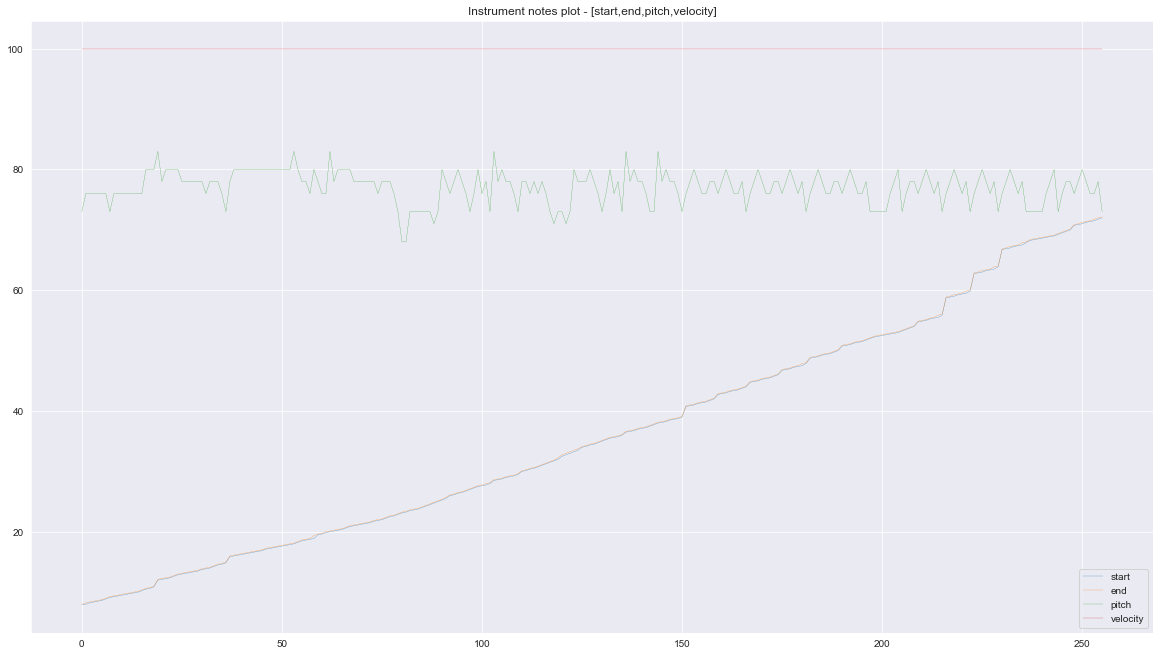

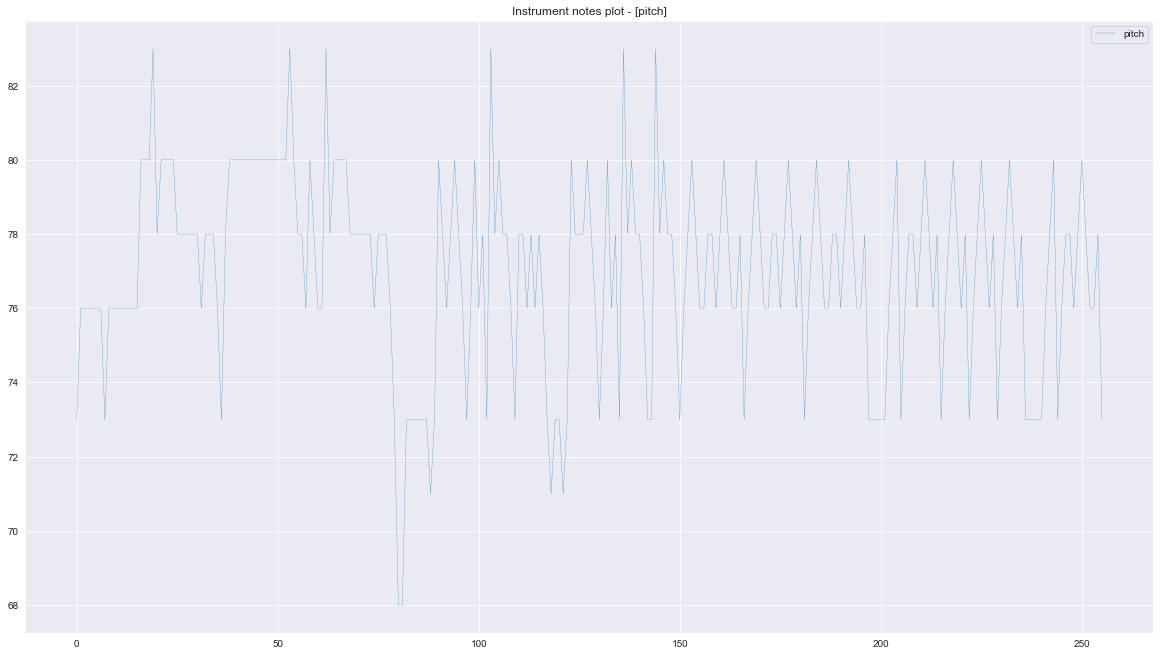

In [7]:
instr = pm.instruments[0]
notes = instr.notes
ic(len(notes), notes[:5])

df = Pmu.plot_single_instrument(instr)
df = Pmu.plot_single_instrument(instr, cols=['pitch'], n=256)
ic(df)


## How to break up the file into bars?
The physical time of notes should correspond to bars, given no tempo change


In [8]:
ic(pm.estimate_tempo())  # Not good?



ic| pm.estimate_tempo(): 232.54658385093225


232.54658385093225